In [754]:
import pymultipleis.multieis as pym
import numpy as onp
import jax.numpy as jnp
import scipy.io as sio
import matplotlib.pyplot as plt
import pandas as pd


In [755]:
def extract_input_parameters(fpath):
    mat = sio.loadmat(fpath)
    F = []
    Y = []
    sigmaY = []
    modY = []
    for i in range(50):

        Y.append(jnp.asarray(mat["Ymr"][i][0].flatten(), dtype=jnp.complex64))
        sigmaY.append(jnp.asarray(mat['sigma_Ymr'][i][0].flatten()))
        modY.append(jnp.abs(jnp.asarray(mat["Ymr"][i][0].flatten())))
    V = mat['Vdr'].flatten()
    F.append(jnp.array(mat["F"][i][0].flatten().astype('float'), dtype=jnp.float64))
    return(jnp.column_stack(F), jnp.column_stack(Y), jnp.column_stack(sigmaY), jnp.column_stack(modY), V)


# F_her, Y_her, sigma_her, mod_her, V = extract_input_parameters('full_her_data/pH12/20211004_ph_12_Y.mat')
F_her, Y_her, sigma_her, mod_her, V = extract_input_parameters(
    '../../../data/Her_data/pt/0,5m/20deg/20230413_4_ext_best_20deg_0,5m_red.mat')


In [658]:
# with open ("../../../docs/source/examples/fit_results/results/sample.npy","w+") as f:
#     data=f.read()
#     f.write (str(Y_her))


In [659]:
print(F_her.shape)
print(Y_her.shape)
print(V.shape)


(35, 1)
(35, 50)
(50,)


In [ ]:
F_her, Y_her, V
(35, 1)
(35, 50)
(50,)

Array([[1.4867877e-05+4.28582171e-05j, 1.4376092e-05+4.29211104e-05j,
        1.3415408e-05+4.29610591e-05j, ...,
        1.2233948e-04+8.89916118e-05j, 1.0715813e-04+8.30523859e-05j,
        9.6493386e-05+7.85838274e-05j],
       [3.8811380e-05+1.08743770e-04j, 3.8322793e-05+1.09459987e-04j,
        3.7423441e-05+1.10225235e-04j, ...,
        1.9821672e-04+1.25164399e-04j, 1.7875715e-04+1.21153796e-04j,
        1.6489453e-04+1.17821219e-04j],
       [6.4345884e-05+1.64203142e-04j, 6.4162996e-05+1.65326463e-04j,
        6.3662614e-05+1.66410944e-04j, ...,
        2.4204167e-04+1.40623088e-04j, 2.2140032e-04+1.37828771e-04j,
        2.0658365e-04+1.35231428e-04j],
       ...,
       [1.8088304e-03+2.95952777e-04j, 1.8064651e-03+2.93412799e-04j,
        1.8042455e-03+2.90906348e-04j, ...,
        1.8837400e-03+4.05113009e-04j, 1.8861744e-03+4.08056425e-04j,
        1.8883314e-03+4.10700944e-04j],
       [1.8604195e-03+2.85795424e-04j, 1.8580379e-03+2.83978559e-04j,
        1.8559631e-03+

In [660]:
# F_her=  (F_her[:]).flatten()
# F_her


In [661]:
print(F_her.ndim)


2


In [662]:
# # redox
# def redox(p, f):
#     w = 2*jnp.pi*f               # Angular frequency
#     s = 1j*w                       # Complex variable
#     Rs = p[0]
#     Qh = p[1]
#     nh = p[2]
#     Rct = p[3]
#     Wct = p[4]
#     Rw = p[5]
#     Zw = Wct/jnp.sqrt(w) * (1-1j) # Planar infinite length Warburg impedance
#     Ydl = s**nh * Qh                # admittance of a CPE
#     Z1 = (1/Zw + 1/Rw)**-1
#     Z2 = (Rct+Z1)
#     Y2 = Z2**-1
#     Y3 = (Ydl + Y2)
#     Z3 = 1/Y3
#     Z = Rs + Z3
#     Y = 1/Z
#     return jnp.concatenate((Y.real, Y.imag), axis = 0)

# #redox
# # p0 = jnp.asarray([2.01978452e+04, 4.50045626e-11, 9.95377059e-01,
# #              7.60438250e+02, 8.18972389e+07, 1.01249315e+07])

# p0 = jnp.asarray([2.27282835e+03, 9.47491951e-11, 9.04473095e-01, 3.24823719e+05,
#  1.08712178e+08, 9.97847296e+14])

# bounds = [[1e-15, 1e15], [1e-15, 1e0], [1e-1, 1e0], [1e-15, 1e15], [1e-15, 1e15], [1e-15, 1e15]]

# # Smoothing factor used with the standard deviation
# #smf_sigma = jnp.asarray([1000000., 1000000., 1000000., 1000000., 1000000., 1000000.])
# smf_sigma = jnp.ones(6) * 10000.
# smf_modulus = jnp.asarray([1., 1., 1., 1., 1., 1.])*0.01  # Smoothing factor used with the modulus

# # smf_inf = jnp.asarray([jnp.inf, 1., 1., 1., 1., 1.])  # Smoothing factor used with the modulus

# labels = {"Rs": "$\Omega$", "Qh": "$F^{nh}$", "nh": "-",
#           "Rct": "$\Omega$", "Wct": "$\Omega\cdot s^{-0.5}$", "Rw": "$\Omega$"}


In [663]:
# def her_4(p, f):
#     w = 2*jnp.pi*f
#     s = 1j * w
#     Rs = p[0]
#     Qh = p[1]
#     nh = p[2]
#     Rad = p[3]
#     Cad= p[4]
#     nad = p[5]
#     Rct= p[6]
#     Wct=p[7]

#     Zw = Wct/jnp.sqrt(w)*(1-1j)
#     Zct  = Rad
#     Yca=(((s**nad)*Cad) + (Zw+ Rct)**-1)
#     Z1=(Yca**-1 +Zct)
#     Y1=(Z1**-1)
#     Ydl= ((s**nh)*Qh)
#     Z = (Rs + (Ydl + Y1)**-1)
#     Y = 1/Z
#     return jnp.concatenate((Y.real, Y.imag), axis = 0)


# p0= jnp.asarray([5.30599838e+02, 1.34765910e-07, 5.10901343e-01 ,4.31756654e+03,
#  1.66682763e-07,7.94115994e-01 ,5.15266807e+03, 2.41751567e+02])


# bounds= [[1e-1,  1e6], [1e-15, 1e-1], [1e-1, 1e0], [1e-1, 1e15], [1e-15,  1e-1], [1e-1, 1e0], [1e-1, 1e15], [1e-1,  1e15]]
# smf_sigma = jnp.asarray([1, 1., 1., 1., 1., 1.,1., 1.])*1000000 # Smoothing factor used with the standard deviation

# smf_modulus = jnp.asarray([ 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,0.1, 0.1])*1 # Smoothing factor used with the modulus

# smf_inf = jnp.asarray([jnp.inf, 1., 1., 1., 1., 1.,1., 1.]) # Smoothing factor used with the modulus

# labels = {"Rs":"$\Omega$", "Qh":"$F^{nh}$", "nh":"-", "Ra":"$\Omega$", "Qad":"$F^{nad}$", "nad":"-", "Rct":"$\Omega$", "W_{ct}":"$\Omega\cdot s^{-0.5}$"}


In [664]:
# full Tafel
def her_4(p, f):
    w = 2*jnp.pi*f
    s = 1j * w
    Rs = p[0]
    Qh = p[1]
    nh = p[2]
    Rad = p[3]
    Cad = p[4]
    nad = p[5]
    Rct = p[6]
    Wct = p[7]
    Wad = p[8]

    Zw = Wct/jnp.sqrt(w)*(1-1j)
    Zwad = Wad/jnp.sqrt(w)*(1-1j)
    Zct = Rad + Zwad
    Yca = (((s**nad)*Cad) + (Zw + Rct)**-1)
    Z1 = (Yca**-1 + Zct)
    Y1 = (Z1**-1)
    Ydl = ((s**nh)*Qh)
    Z = (Rs + (Ydl + Y1)**-1)
    Y = 1/Z
    return jnp.concatenate((Y.real, Y.imag), axis=0)


p0 = jnp.asarray([5.30599838e+02, 1.34765910e-07, 5.10901343e-01, 4.31756654e+03,
                  1.66682763e-07, 7.94115994e-01, 5.15266807e+03, 2.41751567e+02, 2.41751567e+02])


bounds = [[1e-1,  1e6], [1e-15, 1e-1], [1e-1, 1e0], [1e-1, 1e15],
          [1e-15,  1e-1], [1e-1, 1e0], [1e-1, 1e15], [1e-1,  1e15], [1e-1,  1e15]]
# Smoothing factor used with the standard deviation
smf_sigma = jnp.asarray([1, 1., 1., 1., 1., 1., 1., 1., 1])*10000

smf_modulus = jnp.asarray([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]) * \
    1  # Smoothing factor used with the modulus

# Smoothing factor used with the modulus
smf_inf = jnp.asarray([jnp.inf, 1., 1., 1., 1., 1., 1., 1., 1])

labels = {"Rs": "$\Omega$", "Qh": "$F^{nh}$", "nh": "-", "Ra": "$\Omega$", "Qad": "$F^{nad}$",
          "nad": "-", "Rct": "$\Omega$", "W_{ct}": "$\Omega\cdot s^{-0.5}$", "W_{ad}": "$\Omega\cdot s^{-0.5}$"}


In [665]:
# #FULL heyvrosky full expression
# def her_4(p, f):
#     w = 2*jnp.pi*f
#     s = 1j * w
#     Rs = p[0]
#     Cdl = p[1]
#     nh = p[2]
#     Rad= p[3]
#     wh2= p[4]
#     Cad= p[5]
#     nad = p[6]
#     wad = p[7]
#     Rct= p[8]
#     wh=p[9]
#     Cct=p[10]

#     Zwad = wad/jnp.sqrt(w)*(1-1j)
#     Zwh2= wh2/jnp.sqrt(w)*(1-1j)
#     Zwh= wh/jnp.sqrt(w)*(1-1j)
#     ## numerator= 2*(Rct+ (wh2/jnp.sqrt(s)))+2*(Rad+(2/((s**nad)*Cad) ))
#     ## denominator= (Rad+ (2*wad/jnp.sqrt(s)))*(Rct+(wh2/jnp.sqrt(s)))+ (Rct+(((2*wcth+wh2)/jnp.sqrt(s))))*(Rad+(2/s*Cad))
#     numerator= 2*(Rct+ (wh2/jnp.sqrt(s))+(2/s*Cct))+2*(Rad+(2/((s**nad)*Cad)))
#     denominator= (Rad+ (2*Zwad))*(Rct+(Zwh2)+(2/s*Cct))+ (Rct+(2*Zwh+Zwh2)/jnp.sqrt(s))*(Rad+(2/(s**nad)*Cad))
#     Y = numerator/denominator +((s**nh)*Cdl)
#     Z=Y**-1 +Rs
#     Y = 1/Z
#     return jnp.concatenate((Y.real, Y.imag), axis = 0)

# #heyrosky
# p0= jnp.asarray([1.73534438e+03, 1.22223188e-08,0.7, 8.99397120e+03,
#              8.86019607e+04, 4.38744556e-06, 0.6, 6.91906004e+04,
#              1.15532852e+03, 6.77611721e+03, 4.38744556e-06])

# bounds= [[1e-1,  1e15], [1e-15, 1e0],[1e-1, 1e0],[1e-1, 1e15], [1e-1, 1e15], [1e-15,  1e0],[1e-1, 1e0],  [1e-1, 1e15], [1e-1,  1e15], [1e-1,  1e15], [1e-15, 1e0]]
# smf_sigma = jnp.asarray([100000.,100000., 100000., 100000., 100000., 100000., 100000.,100000., 100000.,100000.,100000.])*1 # Smoothing factor used with the standard deviation

# smf_modulus = jnp.asarray([1,1,1,1,1, 1, 1, 1,1, 1, jnp.inf])*0.01# Smoothing factor used with the modulus

# smf_inf = jnp.asarray([1,1,1,1,1, 1, 1, 1,1, 1, jnp.inf]) # Smoothing factor used with the modulus

# labels = {"Rs":"$\Omega$", "Qh":"$F^{nh}$", "nh":"-",  "Ra":"$\Omega$", "W_{h2}":"$\Omega\cdot s^{-0.5}$","Qad":"$F^{nad}$", "nad":"-",  "W_{ad}":"$\Omega\cdot s^{-0.5}$", "Rct":"$\Omega$", "W_{h}":"$\Omega\cdot s^{-0.5}$","Cc":"$F^{cc}$"}
# # labels = {"Rs":"$\Omega$", "Qh":"$F^{nh}$", "nh":"-", "Ra":"$\Omega$", "W_{h2}":"$\Omega\cdot s^{-0.5}$","Qad":"$F^{nad}$", "nad":"-","W_{ad}":"$\Omega\cdot s^{-0.5}$", "Rct":"$\Omega$", "W_{h}":"$\Omega\cdot s^{-0.5}$", "Cct":"$F^{nh}$"}


In [666]:
# # PARAMETER REDUCTION new

# def her_4(p, f):
#     w = 2*jnp.pi*f
#     s = 1j * w
#     Rs = p[0]
#     Cdl = p[1]
#     nh = p[2]
#     Rad= p[3]
#     wh2= p[4]
#     Cad= p[5]
#     nad = p[6]
#     wad = p[7]
#     Rct= p[8]
#     wh=p[9]
#     Cct=p[10]

#     Zwad = wad/jnp.sqrt(w)*(1-1j)
#     Zwh2= wh2/jnp.sqrt(w)*(1-1j)

#     # numerator= 2*(Rct+ (wh2/jnp.sqrt(s)))+2*(Rad+(2/((s**nad)*Cad) ))
#     # denominator= (Rad+ (2*wad/jnp.sqrt(s)))*(Rct+(wh2/jnp.sqrt(s)))+ (Rct+(((2*wcth+wh2)/jnp.sqrt(s))))*(Rad+(2/s*Cad))
#     numerator= 2*(Rct+ (wh2/jnp.sqrt(s)))+2*(Rad+(2/((s**nad)*Cad)))
#     denominator= (Rad+ (2*Zwad))*(Rct+(Zwh2))+ (Rct+(Zwh2)/jnp.sqrt(s))*(Rad+(2/(s**nad)*Cad))
#     Y = numerator/denominator +((s**nh)*Cdl)
#     Z=Y**-1 +Rs
#     Y = 1/Z
#     return jnp.concatenate((Y.real, Y.imag), axis = 0)

# #heyrosky
# p0= jnp.asarray([1.73534438e+03, 1.22223188e-08,0.7, 8.99397120e+03,
#              8.86019607e+04, 4.38744556e-06, 0.6, 6.91906004e+04,
#              1.15532852e+03])

# bounds= [[1e-1,  1e15], [1e-15, 1e0],[1e-1, 1e0],[1e-1, 1e15], [1e-1, 1e15], [1e-15,  1e0],[1e-1, 1e0],  [1e-1, 1e15], [1e-1,  1e15]]
# smf_sigma = jnp.asarray([100000.,100000., 100000., 100000., 100000., 100000., 100000.,100000., 100000., 100000.]) # Smoothing factor used with the standard deviation

# smf_modulus = jnp.asarray([1,1,1,1,1, 1, 1,  1, 1]) # Smoothing factor used with the modulus

# smf_inf = jnp.asarray([jnp.inf, 1., 1., 1., 1., 1., 1., 1.]) # Smoothing factor used with the modulus

# labels = {"Rs":"$\Omega$", "Qh":"$F^{nh}$", "nh":"-",  "Ra":"$\Omega$", "W_{h2}":"$\Omega\cdot s^{-0.5}$","Qad":"$F^{nad}$", "nad":"-",  "W_{ad}":"$\Omega\cdot s^{-0.5}$", "Rct":"$\Omega$"}
# # labels = {"Rs":"$\Omega$", "Qh":"$F^{nh}$", "nh":"-", "Ra":"$\Omega$", "W_{h2}":"$\Omega\cdot s^{-0.5}$","Qad":"$F^{nad}$", "nad":"-","W_{ad}":"$\Omega\cdot s^{-0.5}$", "Rct":"$\Omega$", "W_{h}":"$\Omega\cdot s^{-0.5}$", "Cct":"$F^{nh}$"}


In [667]:
# ##Using SD
# eis_her_sigma = pym.Multieis(p0, F_her[:,0], Y_her, bounds, smf_sigma, her_4,
#                                weight=sigma_her, immittance='admittance')
# popt, perr, chisqr, chitot, AIC = eis_her_sigma.fit_simultaneous(method='tnc')
# eis_her_sigma.plot_nyquist(5)
# eis_her_sigma.plot_params(labels=labels)
# eis_her_sigma.plot_params(True, labels=labels)


In [668]:

# # #redox modullus
# eis_redox_modulus= pym.Multieis(p0, F_her[:,0], Y_her, bounds, smf_modulus, redox,
#                                weight='modulus', immittance='admittance')
# # ##redox
# popt, perr, chisqr, chitot, AIC = eis_redox_modulus.fit_simultaneous(method='tnc')
# eis_redox_modulus.plot_nyquist(5)
# eis_redox_modulus.plot_params(labels=labels)
# eis_redox_modulus.plot_params(True, labels=labels)


In [669]:
# Using SD redox
# eis_redox_sigma = pym.Multieis(p0, F_her[:,0], Y_her, bounds, smf_sigma, redox,
#                                weight=sigma_her, immittance='admittance')
# popt, perr, chisqr, chitot, AIC = eis_redox_sigma.fit_simultaneous(method='tnc')
# eis_redox_sigma.plot_nyquist(5)
# eis_redox_sigma.plot_params(labels=labels)
# eis_redox_sigma.plot_params(True, labels=labels)



Using initial

Optimization complete
total time is 0:00:15.570273 

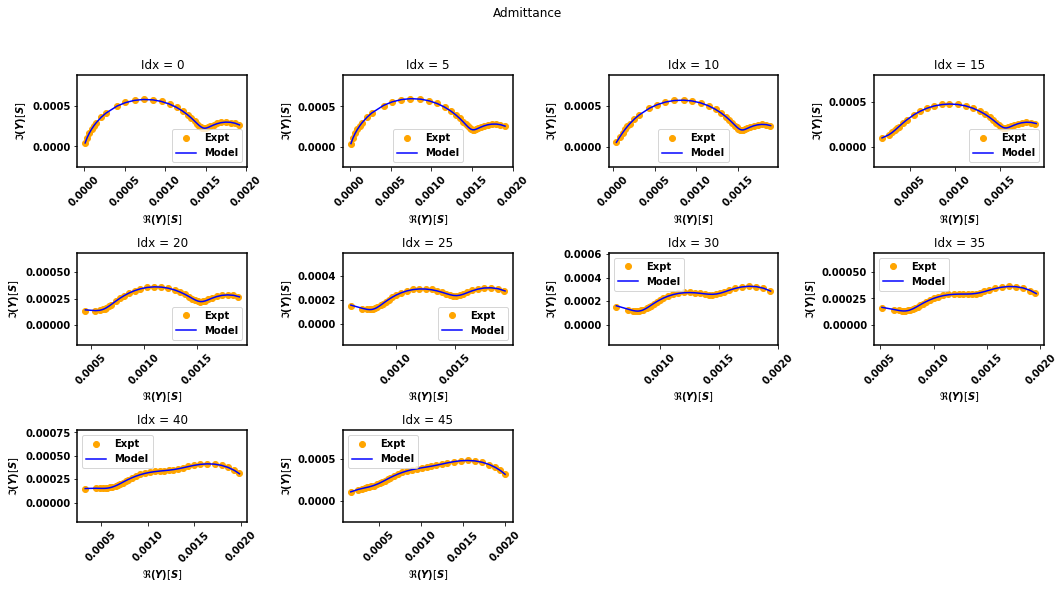

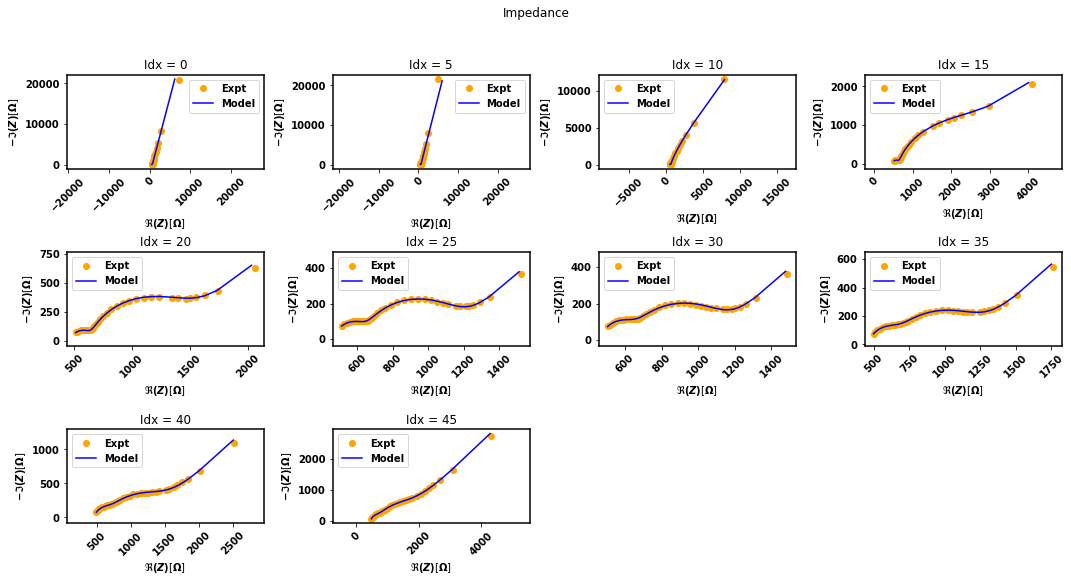

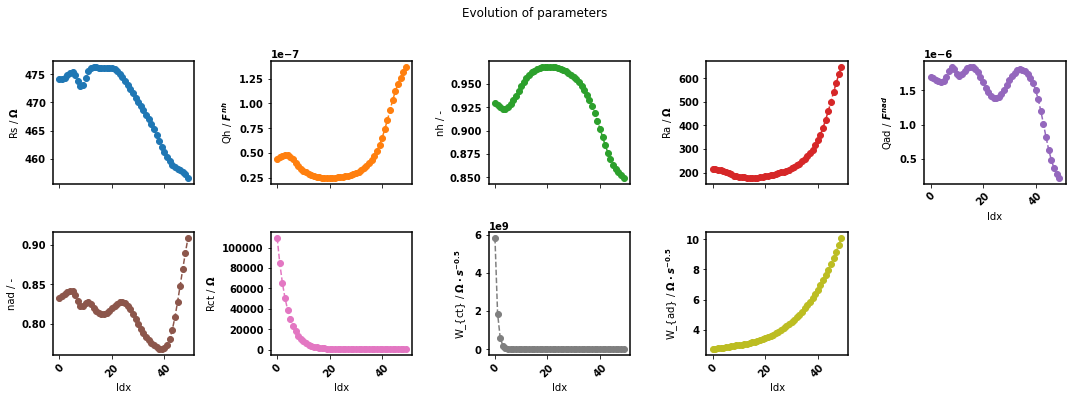

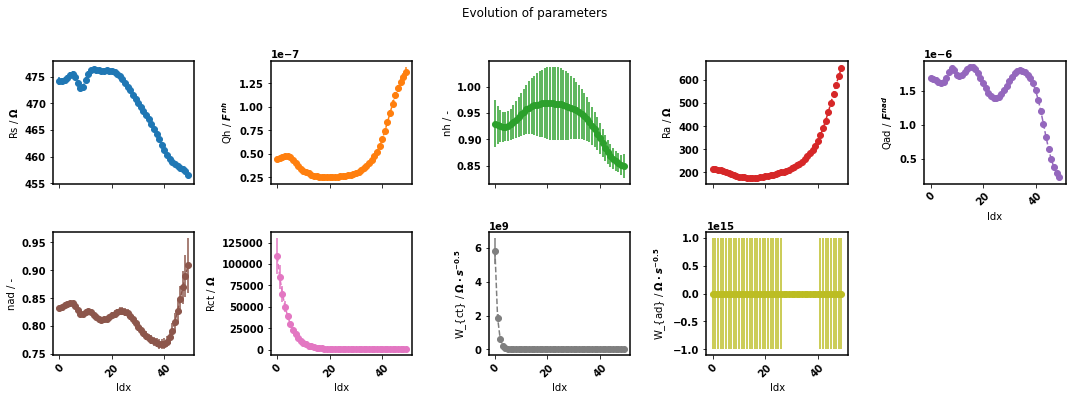

In [670]:
# HER modullus

eis_her_modulus = pym.Multieis(p0, F_her[:, 0], Y_her, bounds, smf_modulus, her_4,
                               weight='modulus', immittance='admittance')

popt, perr, chisqr, chitot, AIC = eis_her_modulus.fit_simultaneous(method='tnc')
eis_her_modulus.plot_nyquist(5)
eis_her_modulus.plot_params(labels=labels)
eis_her_modulus.plot_params(True, labels=labels)


In [671]:
chitot


Array(1.76357022e-05, dtype=float64, weak_type=True)

In [672]:
AIC


Array(-1551.67017176, dtype=float64)

In [673]:
# -1553.70109303, dtype=float64)


In [674]:
# 0.1m
# heyvrosky
# 61.52621967 at 100k
# 63.29 at 1mILL

# tafel
# 28.60352293at 100k

# 0.5m# tafel
#  Chi  50.02432855 at 100k
# AIC   1026.3380144
# heyvrosky
#  Chi  130.87523155
# AIC   6084.24827

# 1m# tafel
#  Chi  230.72043546  at 100k
# AIC    12078.33245866
# heyvrosky
#  Chi  252.14778086
# AIC   12429.50983871

# 1m# tafel
#  Chi  42.926  at 100k
# AIC    595.549353
# heyvrosky
#  Chi  42.36057157
# AIC   468.04611699/

# 1.5m# tafel
#  Chi  257.6531556,  at 100k
# AIC   13402.993386
# heyvrosky
#  Chi  190.77615194
# AIC   8995.56973803


In [675]:
# 163
# 7570.162

# 20.67676113
# -772.40583


In [676]:
min(popt[3, :])*4.9e-4


Array(0.08664033, dtype=float64)

In [677]:
V = V[::-1]


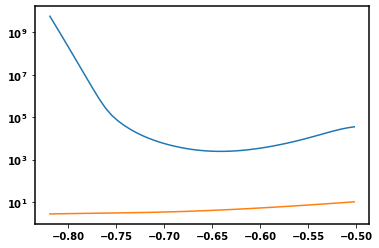

In [678]:
plt.errorbar(V[:], popt[7, :])
plt.errorbar(V[:], popt[8, :])
plt.yscale('log')


In [679]:
min(popt[6, :])*4.9e-4


Array(0.22170617, dtype=float64)

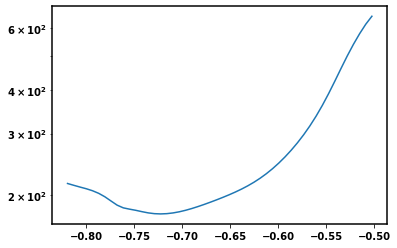

In [680]:
plt.errorbar(V[:], popt[3, :])
# plt.errorbar(V[:], popt[7,:])
plt.yscale('log')



Using initial

Optimization complete
total time is 0:00:14.942511 

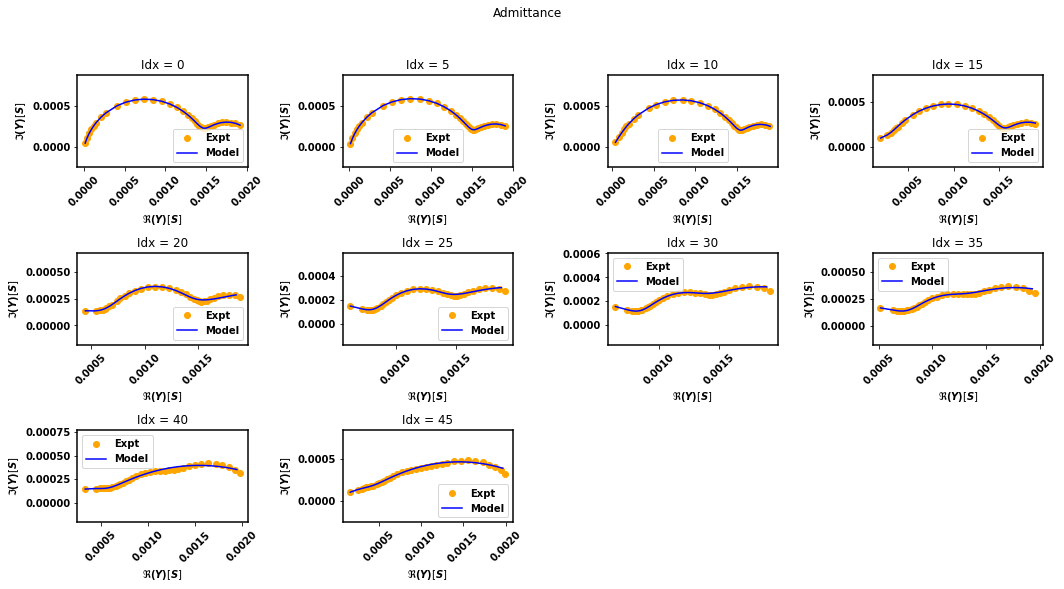

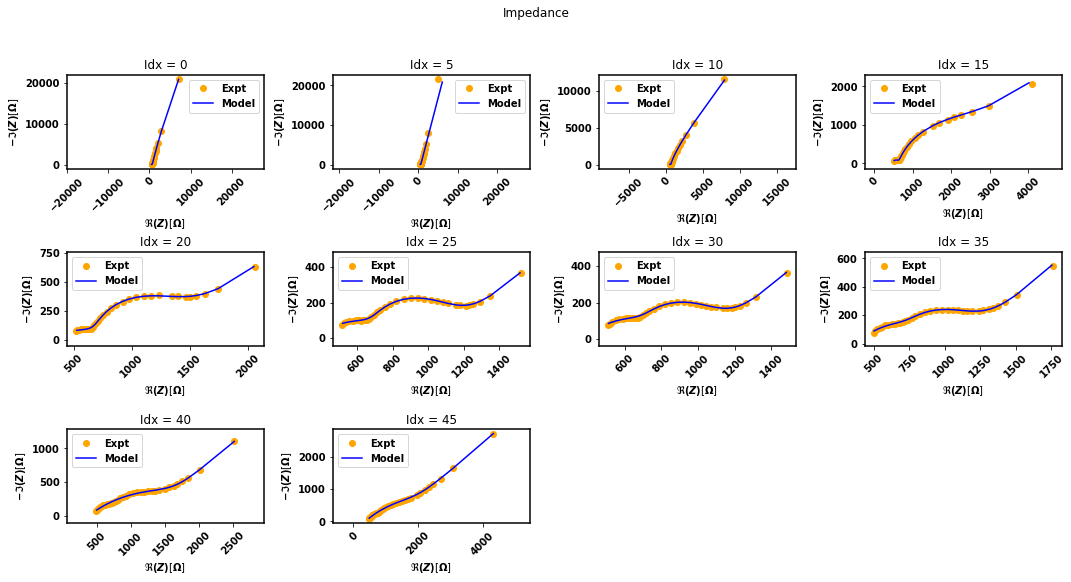

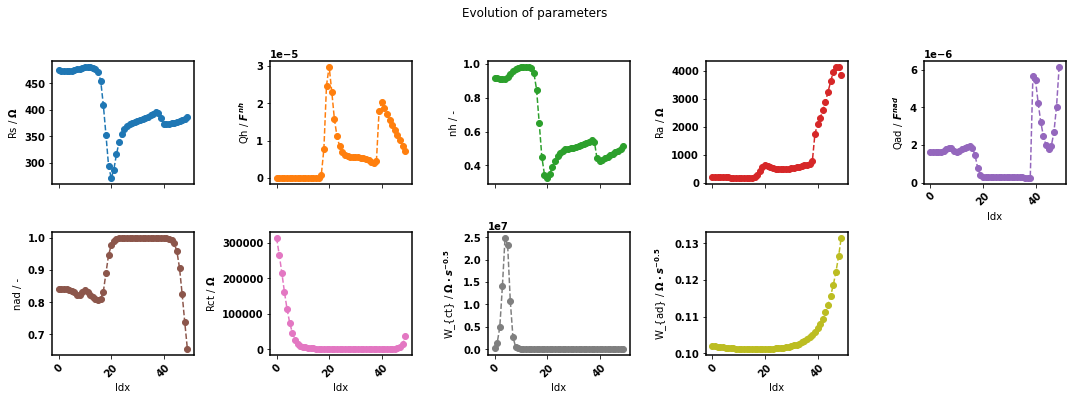

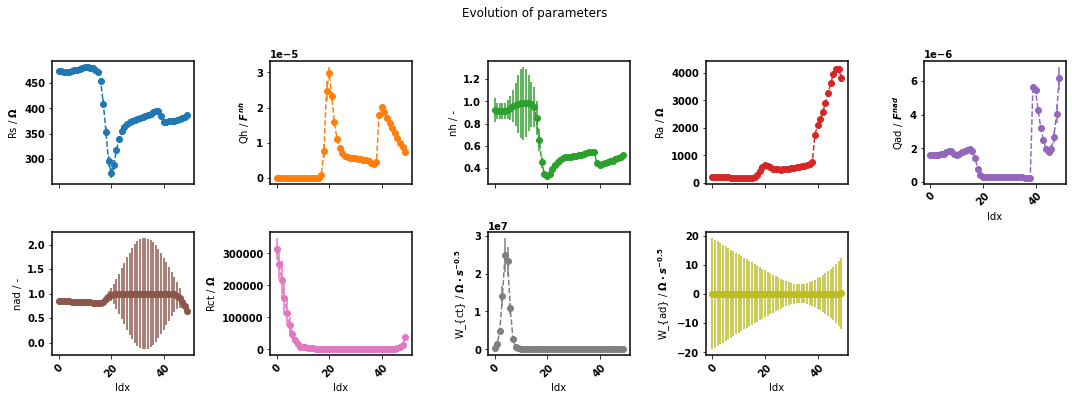

In [681]:
# Using SD
eis_her_sigma = pym.Multieis(p0, F_her[:, 0], Y_her, bounds, smf_sigma, her_4,
                             weight=sigma_her, immittance='admittance')
popt, perr, chisqr, chitot, AIC = eis_her_sigma.fit_simultaneous(method='tnc')
eis_her_sigma.plot_nyquist(5)
eis_her_sigma.plot_params(labels=labels)
eis_her_sigma.plot_params(True, labels=labels)


In [682]:
# Z_her=1/Y_her
# eis_her_modulus.save_results(fname='/home/mugisa/Documents/pymultipleis/data/full_her_data/sept21/1,5m/results')
# a=onp.save("/home/mugisa/Documents/pymultipleis/data/full_her_data/sept21/1,5m/Z_her.npy", Z_her,allow_pickle=True)
# a=onp.save("/home/mugisa/Documents/pymultipleis/data/full_her_data/sept21/1,5m/Voltage.npy", V,allow_pickle=True)


In [683]:
chitot


Array(447.58857157, dtype=float64, weak_type=True)

In [684]:
# min(popt[3,1:-1])*4.9e-6
min(popt[3, :])


Array(172.18087126, dtype=float64)

In [685]:
min(popt[8, :])


Array(0.1010615, dtype=float64)

In [686]:
min(popt[3, :])*4.9e-4


Array(0.08436863, dtype=float64)

In [687]:
min(popt[7, :])


Array(2340.41109071, dtype=float64)

In [688]:
min(popt[4, :])


Array(2.40527382e-07, dtype=float64)

In [689]:
(popt[3, :])*4.9e-4


Array([0.10846426, 0.10693364, 0.10526846, 0.10367381, 0.1017345 ,
       0.09871928, 0.094659  , 0.09063717, 0.08818456, 0.08720523,
       0.08651015, 0.0854625 , 0.08462475, 0.08436863, 0.08508853,
       0.08840253, 0.10129472, 0.13874607, 0.20762068, 0.28435377,
       0.31275661, 0.29757223, 0.27191377, 0.25272239, 0.24145213,
       0.23591822, 0.23457793, 0.23644428, 0.24075582, 0.24683236,
       0.25414257, 0.26235509, 0.27131416, 0.28104509, 0.29171506,
       0.30351648, 0.31626415, 0.32964598, 0.37259083, 0.85664319,
       1.0211642 , 1.13587662, 1.26670714, 1.42038535, 1.59385643,
       1.7761566 , 1.93636593, 2.03052486, 2.02080463, 1.87689523],      dtype=float64)

In [690]:
min(popt[4, :])*4.9e-4


Array(1.17858417e-10, dtype=float64)

In [691]:
min(popt[5, :])


Array(0.65338523, dtype=float64)

In [692]:
min(popt[6, :])


Array(290.76859002, dtype=float64)

In [693]:
min(popt[8, :])


Array(0.1010615, dtype=float64)

In [694]:
min(popt[8, :])*4.9e-4


Array(4.95201374e-05, dtype=float64)

In [695]:
(popt[:, 30])


Array([3.78874389e+02, 5.59074899e-06, 5.05618537e-01, 5.18658302e+02,
       2.89282387e-07, 9.99967609e-01, 2.97947361e+02, 2.47982086e+03,
       1.01923273e-01], dtype=float64)

In [696]:
# def extract_input_parameters(fpath):
#     mat = sio.loadmat(fpath)
#     F = []
#     Y = []
#     sigmaY = []
#     modY = []
#     for i in range(50):

#         Y.append(jnp.asarray(mat["Ymr"][i][0].flatten()/2.5, dtype = jnp.complex64))
#         sigmaY.append(jnp.asarray(mat['Sigma_Ymr'][i][0].flatten()))
#         modY.append(jnp.abs(jnp.asarray(mat["Ymr"][i][0].flatten())))
#     V = mat['Vdr'].flatten()
#     F.append(jnp.array(mat["F"][i][0].flatten().astype('float'), dtype = jnp.float64))
#     return(jnp.column_stack(F), jnp.column_stack(Y),jnp.column_stack(sigmaY),jnp.column_stack(modY), V)

# # F_her, Y_her, sigma_her, mod_her, V = extract_input_parameters('full_her_data/pH12/20211004_ph_12_Y.mat')
# F_her, Y_her, sigma_her, mod_her, V = extract_input_parameters('../../../data/full_her_data/Fc_test/20210927_0,3m_EXRT_ORIGINAL.mat')


In [697]:
# eis_redox_sigma.save_results(fname='fit_results')
# eis_redox_sigma.save_plot_nyquist(5,fname='fit_results')
# working
# Z_her=1/Y_her

# eis_her_modulus.save_results(fname='/home/mugisa/Documents/pymultipleis/data/full_her_data/Nov21/0,1m/results')
# a=onp.save("/home/mugisa/Documents/pymultipleis/data/full_her_data/Nov21/0,1m/Z_her.npy", Z_her,allow_pickle=True)
# a=onp.save("/home/mugisa/Documents/pymultipleis/data/full_her_data/Nov21/0,1m/Voltage.npy", V,allow_pickle=True)
# a=onp.load("../../../docs/source/examples/fit_results/results/sample2.npy",allow_pickle=True)
# a


In [698]:
def her_5(p, f):
    w = 2*jnp.pi*f
    s = 1j * w
    Rs = p[0]
    Cdl = p[1]
    nh = p[2]
    Rad = p[3]
    wh2 = p[4]
    Cad = p[5]
    nad = p[6]
    wad = p[7]
    Rct = p[8]
    wh = p[9]

    Zwad = wad/jnp.sqrt(w)*(1-1j)
    Zwh2 = wh2/jnp.sqrt(w)*(1-1j)
    Zwh = wh/jnp.sqrt(w)*(1-1j)
    # numerator= 2*(Rct+ (wh2/jnp.sqrt(s)))+2*(Rad+(2/((s**nad)*Cad) ))
    # denominator= (Rad+ (2*wad/jnp.sqrt(s)))*(Rct+(wh2/jnp.sqrt(s)))+ (Rct+(((2*wcth+wh2)/jnp.sqrt(s))))*(Rad+(2/s*Cad))
    numerator = 2*(Rct + (wh2/jnp.sqrt(s)))+2*(Rad+(2/((s**nad)*Cad)))
    denominator = (Rad + (2*Zwad))*(Rct+(Zwh2)) + (Rct+(2*Zwh+Zwh2))*(Rad+(2/(s**nad)*Cad))
    Y = numerator/denominator + ((s**nh)*Cdl)
    Z = Y**-1 + Rs
    Y = 1/Z
    return Z


In [699]:
import jax
freq = F_her[:, 0]
params = popt[:, 0:]
reversed_params = params[::-1]
# params = popt[:, 0:]
Z_predd = (jax.vmap(her_5, in_axes=(1, None))(params, freq)).T
# Z_pred=1/Y_pred


In [700]:
Z_her = 1/Y_her


(341.0712707519531, 4273.987933349609, -28.12462577819825, 2170.4493404388427)

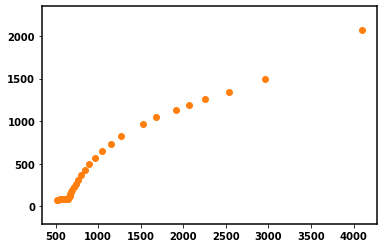

In [701]:
# plt.plot(Y_predd.real[:,15],Y_predd.imag[:,15])
plt.plot(Z_predd.real[:, 15], -Z_predd.imag[:, 15])
plt.plot(Z_her.real[:, 15], -Z_her.imag[:, 15], "o")
plt.axis('equal')


In [702]:
# popt=(popt[:,30])
# print(popt)


In [703]:
# redox
#  popt, perr, chisqr, chitot, AIC = eis_redox_sigma.fit_simultaneous_zero()
# eis_redox_sigma.plot_nyquist(10)
# eis_redox_sigma.plot_bode(steps=10)
# eis_redox_sigma.plot_params(labels=labels)
# eis_redox_sigma.plot_params(True, labels=labels)


In [704]:
# HER
# popt, perr, chisqr, chitot, AIC = eis_her_modulus.fit_simultaneous_zero()
# eis_her_modulus.plot_nyquist(10)
# eis_her_modulus.plot_bode(steps=10)
# eis_her_modulus.plot_params(labels=labels)
# eis_her_modulus.plot_params(True, labels=labels)


In [705]:
min(popt[7, :])


Array(2340.41109071, dtype=float64)

In [706]:
# eis_her_modulus = pym.Multieis(p0, F_her[:,0], Y_her, bounds, smf_modulus, her_4,
#                                weight='modulus', immittance='admittance')

# popt, perr, chisqr, chitot, AIC = eis_her_modulus.fit_stochastic()
# eis_her_modulus.plot_nyquist(10)
# eis_her_modulus.plot_params(show_errorbar=False, labels=labels)
# eis_her_modulus.plot_params(show_errorbar=True, labels=labels)


In [707]:
# Z_her=1/Y_her
# eis_her_modulus.save_results(fname='/home/mugisa/Documents/pymultipleis/data/full_her_data/sept21/1,5m/results')
# a=onp.save("/home/mugisa/Documents/pymultipleis/data/full_her_data/sept21/1,5m/Z_her.npy", Z_her,allow_pickle=True)
# a=onp.save("/home/mugisa/Documents/pymultipleis/data/full_her_data/sept21/1,5m/Voltage.npy", V,allow_pickle=True)


In [708]:
# eis_her_sigma.save_results(fname='fit_results')
# # eis_her_sigma.save_results(fname='fit_results')
# #working
# a=onp.save("fit_results/Y_her.npy", Y_her,allow_pickle=True)
# a=onp.save("fit_results/Voltage.npy", V,allow_pickle=True)
# # a=onp.load("../../../docs/source/examples/fit_results/results/sample2.npy",allow_pickle=True)
# # a


In [709]:
# popt, perr, chisqr, chitot, AIC = eis_her_sigma.fit_sequential()
# eis_her_sigma.plot_nyquist(10)
# eis_her_sigma.plot_params()
# eis_her_sigma.plot_params(show_errorbar=True)


In [710]:
chitot


Array(447.58857157, dtype=float64, weak_type=True)

In [711]:
AIC


Array(24062.09670153, dtype=float64)

In [712]:
# eis_her_sigma.save_results(fname='fit_results')
# V.save_results(fname='fit_results')


In [713]:
# eis_her_sigma.save_results(fname='fit_results')
# # eis_her_sigma.save_results(fname='fit_results')
# #working
# a=onp.save("fit_results/Y_her.npy", Y_her,allow_pickle=True)
# a=onp.save("fit_results/Voltage.npy", V,allow_pickle=True)
# # a=onp.load("../../../docs/source/examples/fit_results/results/sample2.npy",allow_pickle=True)
# # a


In [714]:
# X = jnp.load('../../../docs/source/examples/fit_results/results/fit_results_popt.npy')
# err = jnp.load('../../../docs/source/examples/fit_results/results/fit_results_perr.npy')
# X[7,:]


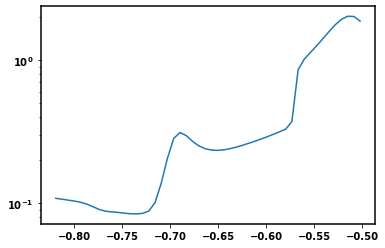

In [715]:
# idx = 7
# V=list(reversed(V))
# plt.errorbar(V, popt[8,:])
plt.plot(V, popt[3, :]*4.9e-4)
plt.yscale('log')
# plt.ylim(1000,10e6)
# plt.plot(popt[6,:])


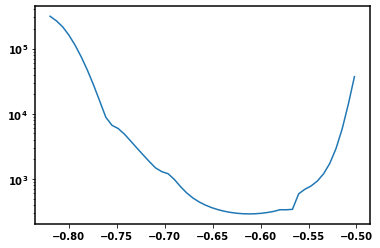

In [716]:

plt.errorbar(V[:], popt[6, :])
plt.yscale('log')


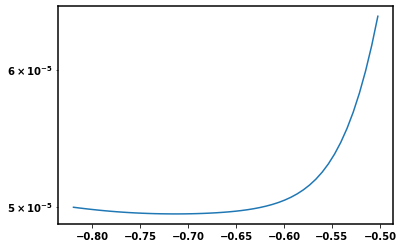

In [717]:
plt.plot(V, popt[8, :]*4.9e-4)
plt.yscale('log')


In [718]:
min(popt[8, :])*4.9e-4


Array(4.95201374e-05, dtype=float64)

In [719]:

popt[4, :]*4.9e-4


Array([7.82311922e-10, 7.82427568e-10, 7.89368993e-10, 7.97359732e-10,
       8.05447068e-10, 8.25296043e-10, 8.64024303e-10, 9.11495995e-10,
       8.95792181e-10, 8.22443151e-10, 7.82214876e-10, 8.20105064e-10,
       8.67445364e-10, 9.04636185e-10, 9.34102718e-10, 9.44843076e-10,
       8.97949244e-10, 7.09530601e-10, 3.76250765e-10, 2.03015513e-10,
       1.52871829e-10, 1.39729237e-10, 1.37272907e-10, 1.37728678e-10,
       1.38743313e-10, 1.39637388e-10, 1.40344689e-10, 1.40917140e-10,
       1.41381945e-10, 1.41697955e-10, 1.41748369e-10, 1.41332232e-10,
       1.40220352e-10, 1.38196517e-10, 1.35134198e-10, 1.31099808e-10,
       1.26146274e-10, 1.17858417e-10, 1.19294838e-10, 2.76879788e-09,
       2.66285874e-09, 2.07818725e-09, 1.57606495e-09, 1.20841107e-09,
       9.68246954e-10, 8.65519611e-10, 9.46954988e-10, 1.30808713e-09,
       1.97928338e-09, 3.01926605e-09], dtype=float64)

In [720]:
min(popt[7, :])


Array(2340.41109071, dtype=float64)

In [721]:
# Cad = jnp.load('../../../docs/source/examples/Params/Cad.csv')
p = pd.read_csv('../../../docs/source/examples/Params/Params.csv').values
voltage = pd.read_csv('../../../docs/source/examples/Params/voltage.csv').values
voltage


FileNotFoundError: [Errno 2] No such file or directory: '../../../docs/source/examples/Params/Params.csv'

In [ ]:
f = (F_her[:]).flatten()
f


In [ ]:
# https://www.youtube.com/watch?v=xBbK2kvHXwE


import sqlite3
conn = sqlite3.connect('Nicole_db')
c = conn.cursor()

#c.execute('''CREATE TABLE meals(sandwich TEXT, fruit TEXT, tablenumber Int)''')
sandwich = 'pork'
fruit = 'pear'
table = '22'

#c.execute ('''INSERT INTO meals VALUES(?,?,?)''',(sandwich,fruit, table))
# conn.commit()

c.execute('''SELECT table FROM meals''')
results = c.fetchall()
print(results)


OperationalError: near "table": syntax error

In [ ]:
import requests
from bs4 import BeautifulSoup
import datetime
import sqlite3


In [ ]:
# How to save scraped data to a database


# create connection
conn = sqlite3.connect('cputest.db')
c = conn.cursor()

#c.execute('''CREATE TABLE prices(date DATE, store TEXT, title TEXT, price REAL, stock TEXT)''');

# scraping function and insert


def getPriceOVC(url):
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:81.0) Gecko/20100101 Firefox/81.0'}
    r = requests.get(url, headers=headers)
    soup = BeautifulSoup(r.content, 'html.parser')
    current_date = datetime.datetime.now()
    store = 'OVC'
    title = soup.find('h1').text.strip().replace('\n', '')
    price = soup.find('div', {'class': 'article_details_price'}
                      ).text.replace('*', '').strip().replace('£', '')
    stock = soup.find('span', {'class': 'popup-text'}).text.strip()

    c.execute('''INSERT INTO prices VALUES(?,?,?,?,?)''',
              (current_date, store, title, price, stock))
    #print(current_date, store, title, price, stock)
    return


# run funtion and commit changes to DB
getPriceOVC('https://www.overclockers.co.uk/amd-ryzen-9-3900x-twelve-core-4.6ghz-socket-am4-processor-retail-cp-3b5-am.html')

conn.commit()
print('complete.')

# select all from table
c.execute('''SELECT * FROM prices''')
results = c.fetchall()
print(results)

# close connection
conn.close()


AttributeError: 'NoneType' object has no attribute 'text'

In [ ]:
popt.shape

(9, 50)

In [ ]:
import mysql.connector


In [ ]:
def create_conn(config):
    try:
        connection = mysql.connector.connect(**config)
        print("Connection established")
        return connection
    except mysql.connector.Error as e:
        print(f"Error: {e}")
        return None


config = {
    'user': 'root',
    'password': 'John123##',
    'host': 'localhost',
    'database': 'Nicole_db',
    'raise_on_warnings': True
}

connection = create_conn(config)


Connection established


In [ ]:
def get_data(connection):
    cursor = connection.cursor()
    cursor.execute("SELECT * FROM Nicole_table")

    rows = cursor.fetchall()
    for row in rows:
        print(row)

    cursor.close()


if connection:
    get_data(connection)
    connection.close()


(None, '20.06.2013', 'Female', 'Ugandan')
(None, '20.06.2013', 'Female', 'Ugandan')
(None, '20.06.2013', 'Female', 'Ugandan')
(None, '10.01.2020', 'male', 'Ugandan')


In [729]:
import mysql.connector
import numpy as np

# Connect to the MySQL database
mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password="John123##",
  database="Nicole_db"
)

In [730]:
mycursor = mydb.cursor()

mycursor.execute("CREATE TABLE fit_params (id INT AUTO_INCREMENT PRIMARY KEY, value INT)")

In [ ]:

mydata=popt
print("Type of popt:", type(popt))
print("Shape of popt:", popt.shape)
# Create a cursor object
mycursor = mydb.cursor()

# Define the SQL statement
num_cols = mydata.shape[1]
sql = "INSERT INTO myarray  ("
for i in range(num_cols):
    sql += "value" + str(i+1) + ","
sql = sql[:-1] + ") VALUES ("
for i in range(num_cols):
    sql += "%s,"
sql = sql[:-1] + ")"

# Insert the data in batches
batch_size = 50
num_rows = mydata.shape[0]
num_batches = int(np.ceil(num_rows / batch_size))
for i in range(num_batches):
    start_idx = i * batch_size
    end_idx = min((i+1) * batch_size, num_rows)
    batch_data = mydata[start_idx:end_idx,:]
    mycursor.executemany(sql, batch_data.tolist())
    mydb.commit()

# Close the database connection
mydb.close()

Type of popt: <class 'jaxlib.xla_extension.Array'>
Shape of popt: (9, 50)


ProgrammingError: 1054 (42S22): Unknown column 'value1' in 'field list'

In [ ]:
import mysql.connector

# Create a database connection

mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password="John123##",
  database="Nicole_db"
)
# Create a cursor object
mycursor = mydb.cursor()

# Execute the DESCRIBE statement
mycursor.execute("DESCRIBE myarray")

# Fetch the column names and print them
columns = [col[0] for col in mycursor.fetchall()]
print(columns)

# Close the database connection
mydb.close()

['id', 'value']


In [ ]:
import jax.numpy as jnp
import numpy as np

# Convert popt to a NumPy array
# mydata = jnp.array(popt)
# mydata = mydata.numpy()
mydata = np.array(popt)
print("Type of popt:", type(mydata))
print("Shape of popt:", mydata.shape)
# Create a cursor object
mycursor = mydb.cursor()

# Define the SQL statement
num_cols = mydata.shape[1]
sql = "INSERT INTO myarray  ("
for i in range(num_cols):
    sql += "value" + str(i+1) + ","
sql = sql[:-1] + ") VALUES ("
for i in range(num_cols):
    sql += "%s,"
sql = sql[:-1] + ")"

# Insert the data in batches
batch_size = 50
num_rows = mydata.shape[0]
num_batches = int(np.ceil(num_rows / batch_size))
for i in range(num_batches):
    start_idx = i * batch_size
    end_idx = min((i+1) * batch_size, num_rows)
    batch_data = mydata[start_idx:end_idx,:]
    mycursor.executemany(sql, batch_data.tolist())
    mydb.commit()

# Close the database connection
mydb.close()

Type of popt: <class 'numpy.ndarray'>
Shape of popt: (9, 50)


ProgrammingError: 1054 (42S22): Unknown column 'value1' in 'field list'

In [743]:
import mysql.connector
import numpy as np

# Connect to the MySQL database
mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password="John123##",
  database="Nicole_db"
)

In [745]:
# # Create a cursor object
# mycursor = mydb.cursor()
# mydata=popt
# # mydata = mydata.numpy()
# mydata = np.array(popt)
# print("Type of mydata:", type(mydata))
# print("Shape of mydata:", mydata.shape)
# # Define the SQL statement
# num_cols = mydata.shape[1]
# sql = "INSERT INTO myarray (id, value) VALUES ("
# for i in range(num_cols):
#     sql += "%s,"
# sql = sql[:-1] + ")"

# # Insert the data in batches
# batch_size = 50
# num_rows = mydata.shape[0]
# num_batches = int(np.ceil(num_rows / batch_size))
# for i in range(num_batches):
#     start_idx = i * batch_size
#     end_idx = min((i+1) * batch_size, num_rows)
#     batch_data = mydata[start_idx:end_idx,:]
#     mycursor.executemany(sql, batch_data.tolist())
#     mydb.commit()

# Close the database connection
# mydb.close()


# # Create a cursor object
# mycursor = mydb.cursor()
# mydata=popt
# # mydata = mydata.numpy()
# mydata = np.array(popt)
# print("Type of mydata:", type(mydata))
# print("Shape of mydata:", mydata.shape)
# # Define the SQL statement
# num_cols = mydata.shape[1]
# sql = "INSERT INTO myarray (id, value) VALUES (%s, "
# sql += ",".join(["%s"] * num_cols) + ")"

# # Insert the data in batches
# batch_size = 50
# num_rows = mydata.shape[0]
# num_batches = int(np.ceil(num_rows / batch_size))
# for i in range(num_batches):
#     start_idx = i * batch_size
#     end_idx = min((i+1) * batch_size, num_rows)
#     batch_data = mydata[start_idx:end_idx,:]
#     values = [(i+1,) + tuple(row) for row in batch_data.tolist()]
#     mycursor.executemany(sql, values)
#     mydb.commit()


# Create a cursor object
mycursor = mydb.cursor()
mydata=popt
# mydata = mydata.numpy()
mydata = np.array(popt)
print("Type of mydata:", type(mydata))
print("Shape of mydata:", mydata.shape)
# Define the SQL statement
num_cols = 50
sql = "INSERT INTO mytable ("
for i in range(num_cols):
    sql += "col" + str(i+1) + ","
sql = sql[:-1] + ") VALUES ("
for i in range(num_cols):
    sql += "%s,"
sql = sql[:-1] + ")"

# Insert the data in batches
batch_size = 50
num_rows = mydata.shape[0]
num_batches = int(np.ceil(num_rows / batch_size))
for i in range(num_batches):
    start_idx = i * batch_size
    end_idx = min((i+1) * batch_size, num_rows)
    batch_data = mydata[start_idx:end_idx,:]
    mycursor.executemany(sql, batch_data.tolist())
    mydb.commit()
# Close the database connection
mydb.close()




Type of mydata: <class 'numpy.ndarray'>
Shape of mydata: (9, 50)


In [752]:
# open the database connection
mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password="John123##",
  database="Nicole_db"
)

In [747]:
mycursor = mydb.cursor()

# Define the SQL statement to retrieve the data
num_cols = 50
sql = "SELECT * FROM mytable"
mycursor.execute(sql)

# Fetch the data and convert it to a numpy array
data = np.array(mycursor.fetchall())
mydata = data[:,1:num_cols+1].astype(np.float)

# Close the database connection
mydb.close()

# Print the retrieved data
print(mydata)

[[4.73569568e+02 4.72806046e+02 4.72260974e+02 4.72453118e+02
  4.73595999e+02 4.75224138e+02 4.76002330e+02 4.77166673e+02
  4.79476747e+02 4.81183521e+02 4.81098203e+02 4.80186203e+02
  4.78883033e+02 4.76559802e+02 4.71520159e+02 4.54866304e+02
  4.09422256e+02 3.53326695e+02 2.94792820e+02 2.71832578e+02
  2.87715213e+02 3.16309897e+02 3.39186597e+02 3.53967616e+02
  3.63412550e+02 3.69457497e+02 3.73259996e+02 3.75655220e+02
  3.77355307e+02 3.78874389e+02 3.80481042e+02 3.82311762e+02
  3.84410764e+02 3.86756375e+02 3.89409691e+02 3.92496615e+02
  3.95092609e+02 3.93767299e+02 3.85481848e+02 3.72921267e+02
  3.73233917e+02 3.74088297e+02 3.74864503e+02 3.75736230e+02
  3.76782782e+02 3.78210599e+02 3.79964178e+02 3.82729918e+02
  3.86078045e+02]
 [5.26346458e-08 5.35296209e-08 5.41585744e-08 5.27018708e-08
  4.66508334e-08 3.74240630e-08 2.95245509e-08 2.54853552e-08
  2.41211748e-08 2.33471395e-08 2.22543768e-08 2.13709481e-08
  2.12289992e-08 2.27297885e-08 3.10865935e-08 8.958

/tmp/ipykernel_109139/2951405533.py:10: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mydata = data[:,1:num_cols+1].astype(np.float)


In [739]:
mycursor = mydb.cursor()

# Define the SQL statement
sql = "CREATE TABLE mytable ("
for i in range(50):
    sql += "col" + str(i+1) + " DOUBLE,"
sql = sql[:-1] + ")"

# Create the table
mycursor.execute(sql)

# Close the database connection
# mydb.close()

ProgrammingError: 1050 (42S01): Table 'mytable' already exists

In [3]:
mycursor.execute("SHOW TABLES")
tables = mycursor.fetchall()
print(tables)

[('Nicole_table',), ('fit_params',), ('myarray',), ('mytable',)]


In [741]:

# Execute the DESCRIBE statement
mycursor.execute("DESCRIBE mytable")

# Fetch the column names and print them
columns = [col[0] for col in mycursor.fetchall()]
print(columns)

# Close the database connection
mydb.close()

['col1', 'col2', 'col3', 'col4', 'col5', 'col6', 'col7', 'col8', 'col9', 'col10', 'col11', 'col12', 'col13', 'col14', 'col15', 'col16', 'col17', 'col18', 'col19', 'col20', 'col21', 'col22', 'col23', 'col24', 'col25', 'col26', 'col27', 'col28', 'col29', 'col30', 'col31', 'col32', 'col33', 'col34', 'col35', 'col36', 'col37', 'col38', 'col39', 'col40', 'col41', 'col42', 'col43', 'col44', 'col45', 'col46', 'col47', 'col48', 'col49', 'col50']


In [ ]:
mycursor = mydb.cursor()

mycursor.execute("CREATE TABLE fit_params (id INT AUTO_INCREMENT PRIMARY KEY, value INT)")

In [19]:
import numpy as np
import mysql.connector

# Connect to the MySQL database
mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password="John123##",
  database="Nicole_db"
)

# Create a cursor object
mycursor = mydb.cursor()

# Sample impedance data
impedance_data = np.random.rand(35, 50) + 1j * np.random.rand(35, 50)

# Create a new table for the data
# mycursor.execute("CREATE TABLE impedance_data (id INT AUTO_INCREMENT PRIMARY KEY, real_part FLOAT, imag_part FLOAT)")


# Insert the data into the table
batch_size = 50
num_rows = impedance_data.shape[0]
num_batches = int(np.ceil(num_rows / batch_size))
for i in range(num_batches):
    start_idx = i * batch_size
    end_idx = min((i+1) * batch_size, num_rows)
    batch_data = impedance_data[start_idx:end_idx,:]
    for j in range(batch_data.shape[0]):
        for k in range(batch_data.shape[1]):
            sql = "INSERT INTO impedance_data (real_part, imag_part) VALUES (%s, %s)"
            val = (float(batch_data[j,k].real), float(batch_data[j,k].imag))
            mycursor.execute(sql, val)

# Commit the changes and close the connection
mydb.commit()







In [21]:
impedance_data

array([[0.26743916+2.73925534e-01j, 0.27342174+5.15808032e-01j,
        0.6508575 +7.08745285e-01j, ..., 0.80870232+5.72369560e-01j,
        0.18108691+2.18481093e-01j, 0.40789494+5.17635861e-01j],
       [0.35038408+6.19830550e-04j, 0.75286121+1.02665112e-01j,
        0.27021257+3.37662180e-01j, ..., 0.52954832+2.21694300e-01j,
        0.55302463+2.74265781e-01j, 0.59060771+3.72355416e-01j],
       [0.00440075+7.66535051e-01j, 0.32591622+3.05782150e-01j,
        0.33717043+9.51421234e-01j, ..., 0.89038882+4.23057439e-01j,
        0.14427502+3.00117712e-01j, 0.64657943+6.21708528e-01j],
       ...,
       [0.10128868+7.09917078e-01j, 0.47814414+8.82215095e-01j,
        0.06048715+3.99292711e-01j, ..., 0.57581029+1.03871787e-01j,
        0.95945525+1.90836761e-01j, 0.55906348+1.90953796e-01j],
       [0.35662997+1.55752261e-02j, 0.94606443+6.72446164e-01j,
        0.17216185+7.41631992e-01j, ..., 0.13318443+9.63780278e-01j,
        0.41504131+1.71530793e-01j, 0.9980843 +7.81535364e-01j]

In [23]:


import numpy as np
import mysql.connector

# Connect to the MySQL database
mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password="John123##",
  database="Nicole_db"
)

# Create a cursor object
mycursor = mydb.cursor()

# Sample impedance, frequency, and voltage data
impedance_data = np.random.rand(35, 50) + 1j * np.random.rand(35, 50)
frequency_data = np.random.rand(35, 1)
voltage_data = np.random.rand(50)

# Create a new table for the data
mycursor.execute("CREATE TABLE impedance_table (id INT AUTO_INCREMENT PRIMARY KEY, frequency FLOAT, voltage FLOAT, real_part FLOAT, imag_part FLOAT)")

# Insert the data into the table
batch_size = 50
num_rows = impedance_data.shape[0]
num_batches = int(np.ceil(num_rows / batch_size))
for i in range(num_batches):
    start_idx = i * batch_size
    end_idx = min((i+1) * batch_size, num_rows)
    batch_impedance = impedance_data[start_idx:end_idx,:]
    batch_frequency = frequency_data[start_idx:end_idx,:]
    for j in range(batch_impedance.shape[0]):
        for k in range(batch_impedance.shape[1]):
            sql = "INSERT INTO impedance_table (frequency, voltage, real_part, imag_part) VALUES (%s, %s, %s, %s)"
            val = (float(batch_frequency[j]), float(voltage_data[k]), float(batch_impedance[j,k].real), float(batch_impedance[j,k].imag))
            mycursor.execute(sql, val)

# Commit the changes and close the connection
mydb.commit()

In [27]:
# retrieving impedance_data
# Create a cursor object
mycursor = mydb.cursor()

# Retrieve the impedance data
mycursor.execute("SELECT real_part, imag_part FROM impedance_data")
result = mycursor.fetchall()
impedance_data = np.array([complex(r[0], r[1]) for r in result])

In [30]:
# Retrieve the voltage data
mycursor.execute("SELECT voltage FROM impedance_table")
result = mycursor.fetchall()
voltage = np.array([r[0] for r in result])

# Retrieve the frequency data
mycursor.execute("SELECT frequency FROM impedance_table")
result = mycursor.fetchall()
frequency = np.array([r[0] for r in result])

In [29]:
mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password="John123##",
  database="Nicole_db"
)
# Execute the DESCRIBE statement
mycursor.execute("DESCRIBE impedance_data")

# Fetch the column names and print them
columns = [col[0] for col in mycursor.fetchall()]
print(columns)

['id', 'real_part', 'imag_part']


In [14]:
import mysql.connector
mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password="John123##",
  database="Nicole_db"
)

# Create a cursor object
mycursor = mydb.cursor()

# Define the name of the table to be deleted
table_name = "impedance_data"

# Execute the SQL statement to drop the table
mycursor.execute(f"DROP TABLE {table_name}")

# Commit the changes and close the connection
mydb.commit()
